<h3>Indro Dwi Saputro <br>
2009106099</h3>

<b>Import library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("titanic_data.csv")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

In [5]:
df['deck'] = imputer_modus.fit_transform(df[['deck']])

df.isna().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck             0
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df['age'] = imputer_mean.fit_transform(df[['age']])

df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [7]:
df.dropna(inplace=True)

df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [44]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

<b>Algoritma KMeans</b>

<b>Membuat model dan label

In [45]:
#Buat objek dari k means dengan jumlah cluster : 4
model = KMeans(n_clusters=4)


In [46]:
# Menentukan atribut yang ingin di latih disini saya memilih survived dan age
points = df[["survived","age"]]

In [47]:
model.fit(points)
# Memilih label untuk cluster
labels = model.labels_
print(labels)

[1 0 1 0 0 0 2 3 0 1 3 2 1 0 1 2 3 0 0 0 0 0 1 0 3 0 0 1 0 0 0 0 0 2 0 0 0
 1 1 1 0 0 0 3 1 0 0 0 1 3 1 2 0 2 0 1 0 3 3 1 2 3 0 0 0 1 1 1 0 1 1 1 0 1
 3 0 1 0 0 0 1 0 1 1 1 0 1 2 1 2 2 1 0 0 0 1 0 0 0 1 0 0 0 2 1 1 1 1 1 2 0
 1 3 1 0 0 2 3 0 1 0 2 0 1 2 1 1 1 0 1 1 0 1 1 1 1 1 0 3 0 0 2 1 2 0 0 2 1
 0 0 0 2 0 1 1 3 3 0 2 0 0 2 3 3 2 1 0 2 0 0 0 0 3 3 3 0 0 2 0 0 0 1 1 3 2
 2 0 1 0 0 2 1 3 0 1 1 0 1 0 1 0 0 0 0 0 1 0 2 0 1 1 1 1 0 0 0 2 3 1 0 2 3
 1 0 0 0 1 0 2 1 1 0 2 0 0 2 0 0 0 0 0 0 2 3 2 0 0 0 1 1 2 0 0 1 0 0 2 2 0
 3 0 2 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 3 0 2 0 1 0 3 0 1 0 0 1 1 1 2 1 1 2 0
 0 0 0 1 0 2 0 0 1 0 2 0 1 0 0 0 2 2 3 1 0 0 1 0 0 3 0 1 0 1 1 1 0 0 0 2 0
 0 2 0 1 1 1 1 1 3 0 1 0 1 1 0 3 0 0 1 3 0 0 1 0 1 0 1 1 1 0 2 1 0 0 1 1 0
 1 0 2 3 1 0 0 2 0 0 1 3 1 0 0 1 0 1 0 0 0 1 2 1 1 1 2 0 2 1 1 0 0 3 1 0 3
 2 0 0 0 2 0 2 0 2 2 0 2 2 0 2 0 3 0 0 1 1 0 0 1 3 3 2 2 1 0 2 3 1 2 2 0 2
 0 1 1 1 0 0 1 1 0 0 0 1 0 0 2 1 2 0 0 0 0 0 2 0 0 0 0 1 3 1 0 0 3 2 0 0 1
 0 3 3 0 2 2 1 0 0 3 1 0 

<b>Evaluasi Hasil dari model yang telah dibuat

In [48]:
# Buat dataframe dengan label dan age sebagai kolom
dfKmeans = pd.DataFrame({'labels': labels, 'sex': df.sex})
ct = pd.crosstab(dfKmeans["labels"],dfKmeans["sex"])
print(ct)

sex     female  male
labels              
0          127   227
1           94   138
2           39    86
3           31    37


<b>Melihat Centroid

In [49]:
X = points['survived']
Y = points['age']

In [50]:
centroid = model.cluster_centers_

centroid

array([[ 0.4180791 , 32.37108204],
       [ 0.38362069, 20.78017241],
       [ 0.36      , 52.552     ],
       [ 0.57352941,  4.82970588]])

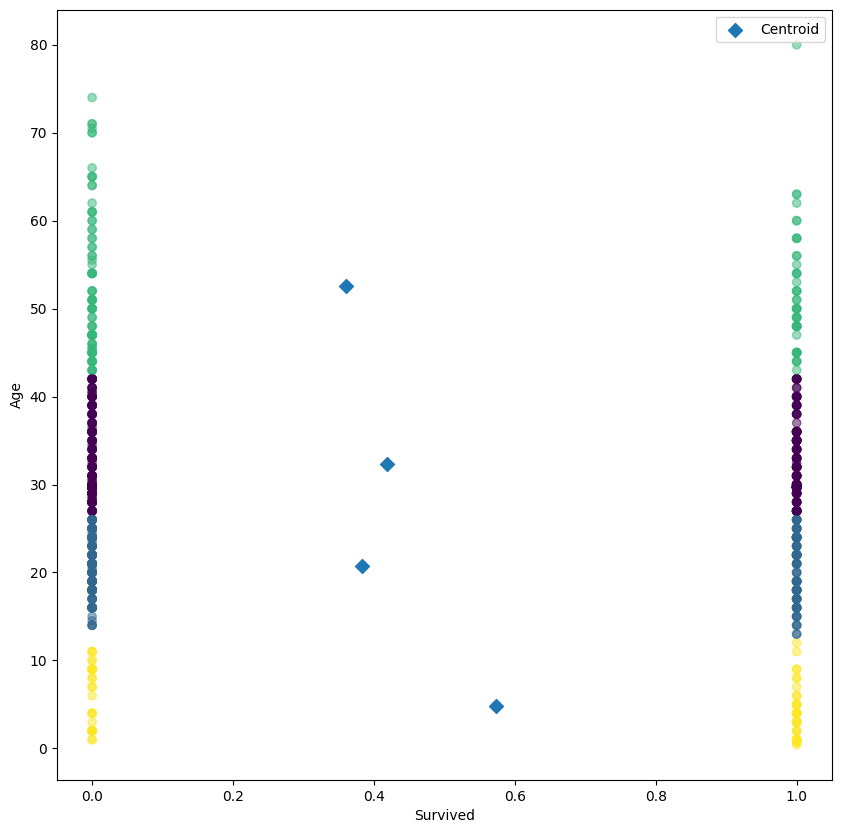

In [51]:
centroids_x = centroid[:,0]
centroids_y = centroid[:,1]
plt.figure(figsize=(10,10))
plt.scatter(X,Y,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.legend()
plt.show()

In [56]:
cluster_range = range(1,4)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

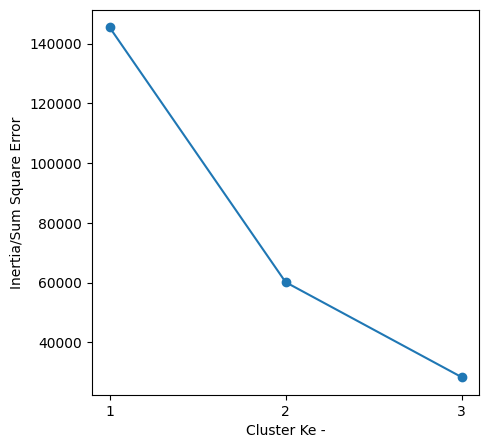

In [58]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster Ke -')
plt.ylabel('Inertia/Sum Square Error')
plt.xticks(cluster_range)
plt.show()